In [127]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression, LogisticRegression
import lazypredict
from lazypredict.Supervised import LazyClassifier


In [207]:
Vegas_Odds = pd.read_excel('nba odds 2020-21 Update.xlsx')

In [208]:
Vegas_Odds.isna().mean()

Date    0.00
VH      0.00
Team    0.00
Final   0.00
Open    0.00
Close   0.00
dtype: float64

In [130]:
pd.to_datetime(Vegas_Odds['Date'])

0      2020-12-22
1      2020-12-22
2      2020-12-22
3      2020-12-22
4      2020-12-23
          ...    
2155   2021-05-16
2156   2021-05-16
2157   2021-05-16
2158   2021-05-16
2159   2021-05-16
Name: Date, Length: 2160, dtype: datetime64[ns]

In [209]:
Vegas_Odds_Home =  Vegas_Odds[Vegas_Odds['VH'] == 'H']
Vegas_Odds_Visitor =  Vegas_Odds[Vegas_Odds['VH'] == 'V']

In [210]:
Vegas_Odds_Home.rename(columns={'Team':'Home_Team','Final':'Home_Score','Open':'HOpen','Close':'HClose'},inplace=True)
#Vegas_Odds_Home.drop(columns=['VH','Rot'],inplace=True)

In [211]:
Vegas_Odds_Visitor.rename(columns={'Team':'Visitor_Team','Final':'Visitor_Score','Open':'VOpen','Close':'VClose'},inplace=True)
#Vegas_Odds_Visitor.drop(columns=['VH','Rot'],inplace=True)

In [212]:
Vegas_Odds_Home.insert(0,'index',range(0+ len(Vegas_Odds_Home)))

In [213]:
Vegas_Odds_Home.set_index('index',inplace=True)

In [214]:
Vegas_Odds_Visitor.insert(0,'index',range(0+ len(Vegas_Odds_Visitor)))

In [215]:
Vegas_Odds_Visitor.set_index('index',inplace=True)

In [230]:
Vegas_Final = pd.merge(Vegas_Odds_Home,Vegas_Odds_Visitor, left_index=True, right_index=True,how='outer')

In [139]:
Vegas_Final.set_index('Date_x',inplace=True)

In [231]:
Vegas_Final = Vegas_Final[['Date_x','Home_Team','Visitor_Team','Home_Score',
                          'Visitor_Score','HOpen','HClose','VOpen','VClose']]

In [232]:
Vegas_Final['HOpen'] = np.where((Vegas_Final['HOpen'] == 'pk'),0,Vegas_Final['HOpen'])
Vegas_Final['HClose'] = np.where((Vegas_Final['HClose'] == 'pk'),0,Vegas_Final['HClose'])
Vegas_Final['VOpen'] = np.where((Vegas_Final['VOpen'] == 'pk'),0,Vegas_Final['VOpen'])
Vegas_Final['VClose'] = np.where((Vegas_Final['VClose'] == 'pk'),0,Vegas_Final['VClose'])

In [233]:
def spread(row,x):
    if row['HOpen'] < x:
        return row['HOpen']
    else:
        return (row['VOpen']*-1) 

In [234]:
Vegas_Final['OSpread'] = Vegas_Final.apply(lambda row: spread(row,20),axis=1)

In [235]:
def Cspread(row,x):
    if row['HClose'] < x:
        return row['HClose']
    else:
        return (row['VClose']*-1) 

In [236]:
Vegas_Final['CSpread'] = Vegas_Final.apply(lambda row: Cspread(row,20),axis=1)

In [237]:
Vegas_Final['PointDiff'] = Vegas_Final['Home_Score'] - Vegas_Final['Visitor_Score']

In [238]:
Vegas_Final['Home_Win'] = np.where(Vegas_Final.Home_Score > Vegas_Final.Visitor_Score,
                                  1, 0)

In [239]:
Vegas_Final['OSpreadWin'] = np.where(Vegas_Final.PointDiff > Vegas_Final['OSpread'],1, 0)
Vegas_Final['CSpreadWin'] = np.where(Vegas_Final.PointDiff > Vegas_Final['CSpread'],1, 0)

In [240]:
def conditions(s):
    if (s['OSpreadWin'] == 1) & (s['CSpreadWin'] == 1):
        return 1
    else:
        return 0

In [150]:
#VEGAS = pd.get_dummies(Vegas_Final[['Home_Team','Visitor_Team']],drop_first=True)

In [151]:
#VEGAS

In [152]:
#BIGVEGAS=pd.concat([Vegas_Final,VEGAS], axis=1)

In [153]:
#BIGVEGAS.drop(['Home_Team','Visitor_Team','Home_Score','HOpen','HClose','VOpen','VClose','OSpread','CSpread','OSpreadWin','CSpreadWin','SpreadW'],inplace = True,axis=1)

In [241]:
Vegas_Final['SpreadW'] = Vegas_Final.apply(lambda s: conditions(s),axis=1)

In [266]:
Vegas_Final['Home_Team'].unique()

array(['Brooklyn', 'LALakers', 'Cleveland', 'Indiana', 'Orlando',
       'Philadelphia', 'Boston', 'Toronto', 'Chicago', 'Memphis',
       'Minnesota', 'Denver', 'Portland', 'Phoenix', 'Miami', 'Milwaukee',
       'Detroit', 'Washington', 'Charlotte', 'NewYork', 'SanAntonio',
       'Utah', 'Sacramento', 'LAClippers', 'NewOrleans', 'Atlanta',
       'OklahomaCity', 'Dallas', 'Houston', 'GoldenState'], dtype=object)

In [278]:
PS = Vegas_Final.sort_values(by=['Home_Team','Date_x'])[['Date_x','Home_Team','Home_Score']]

In [290]:
PS.rolling(5,min_periods=5).mean()

,Home_Score
index,
40,nan
82,nan
94,nan
109,nan
150,nan
...,...
905,nan
922,nan
964,nan


In [293]:
PS['Home_Score'].mean

<bound method Series.mean of index
40      128
82       91
94      108
109      94
150     112
       ... 
905     143
922     116
964     154
1051    120
1077    115
Name: Home_Score, Length: 1080, dtype: int64>

In [270]:
for row in Vegas_Final.iterrows():
    Vegas_Final[team == 'Home_Team' and date < 'Date_x']

<generator object DataFrame.iterrows at 0x7ff638ce0970>

In [ ]:
Vegas_Final.rolling(5)

In [157]:
#for each game:
#    take the home team and the date
#    all_games_df[team == home_team and date < current date]. sort_by date limit to 5
#    get average points
#   add that to vegasfinal dataframe vegas_final.loc(game_id)[home_last5 ppg]= last_5 _ppg
#    now do this for away team

In [269]:
#Vegas_Final.groupby('Home_Team')['Home_Score'].mean().sort_values(ascending=False)

In [268]:
#Vegas_Final.groupby('Visitor_Team')['Visitor_Score'].mean().sort_values(ascending=False)

In [ ]:
def game(HomeTeam,Score):
    for each game:
        if Vegas_Final['Home_Team' == 'Home_Team' and 'Date_x'< 'Date_x'].sort_values(axis=1)
        

In [156]:
#for game:
#    for 'Home_Team' and Date_x:
        

<AxesSubplot:>

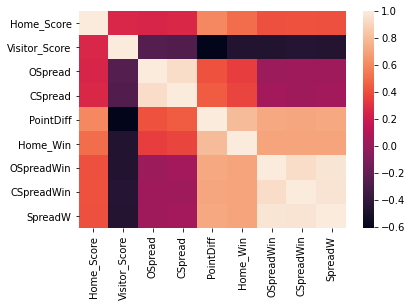

In [158]:
sns.heatmap(Vegas_Final.corr())

In [159]:
feature_cols=['OSpread','CSpread']

In [160]:
X = Vegas_Final[feature_cols]
y = Vegas_Final['SpreadW']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42,test_size=0.33)


In [161]:
clf = LazyClassifier(verbose=0,custom_metric=None)

In [162]:
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:00<00:00, 33.39it/s]


In [163]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearDiscriminantAnalysis,0.55,0.52,0.52,0.46,0.02
NuSVC,0.52,0.52,0.52,0.52,0.03
LinearSVC,0.55,0.51,0.51,0.45,0.01
RidgeClassifier,0.55,0.51,0.51,0.45,0.01
LogisticRegression,0.55,0.51,0.51,0.44,0.01
GaussianNB,0.53,0.50,0.50,0.49,0.01
RidgeClassifierCV,0.54,0.50,0.50,0.43,0.01
NearestCentroid,0.50,0.50,0.50,0.50,0.01
Perceptron,0.46,0.50,0.50,0.33,0.01


In [164]:
lm = LogisticRegression(random_state=42)

In [165]:
model=lm.fit(X_train, y_train)

In [166]:
lm.score(X_train,y_train)

0.5145228215767634

In [167]:
y_pred = lm.predict(X_test)

In [168]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [169]:
cv_results = cross_validate(
    estimator = model,
    X = X_train,
    y = y_train,
    cv = 5,
    return_train_score = True
)

In [170]:
cv_results['train_score']

array([0.53287197, 0.52249135, 0.53806228, 0.52677029, 0.52158895])

In [171]:
cv_results['test_score']

array([0.51724138, 0.51724138, 0.53793103, 0.52083333, 0.4375    ])

In [172]:
df = pd.DataFrame({'actual':y_test, 'Predicted':y_pred})

In [173]:
df

,actual,Predicted
Date_x,,
2021-02-18,0,0
2021-03-12,1,0
2021-04-04,1,0
2021-03-17,0,0
2021-05-14,1,0
...,...,...
2021-03-18,1,0
2021-01-29,0,0
2021-03-11,1,0


In [259]:
Teams = pd.read_csv('teams.csv')


In [261]:
Teams

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.00,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.00,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,nan,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.00,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.00,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends
5,0,1610612743,1976,2019,DEN,Nuggets,1976,Denver,Pepsi Center,19099.00,Stan Kroenke,Tim Connelly,Michael Malone,No Affiliate
6,0,1610612745,1967,2019,HOU,Rockets,1967,Houston,Toyota Center,18104.00,Tilman Fertitta,Daryl Morey,Mike D'Antoni,Rio Grande Valley Vipers
7,0,1610612746,1970,2019,LAC,Clippers,1970,Los Angeles,Staples Center,19060.00,Steve Ballmer,Michael Winger,Doc Rivers,Agua Caliente Clippers of Ontario
8,0,1610612747,1948,2019,LAL,Lakers,1948,Los Angeles,Staples Center,19060.00,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers
9,0,1610612748,1988,2019,MIA,Heat,1988,Miami,AmericanAirlines Arena,19600.00,Micky Arison,Pat Riley,Erik Spoelstra,Sioux Falls Skyforce


In [262]:
REGSEASON.merge(Teams[['TEAM_ID','NICKNAME']],left_on=['HOME_TEAM_ID'],right_on=['TEAM_ID'])

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,TEAM_ID,NICKNAME
0,2021-05-16,22001073,Final,1610612752,1610612738,2020,1610612752,96.00,0.43,0.79,...,1610612738,92.00,0.41,0.73,0.27,19.00,46.00,1,1610612752,Knicks
1,2021-05-15,22001064,Final,1610612752,1610612766,2020,1610612752,118.00,0.51,0.80,...,1610612766,109.00,0.38,0.75,0.27,28.00,51.00,1,1610612752,Knicks
2,2021-05-13,22000458,Final,1610612752,1610612759,2020,1610612752,102.00,0.41,1.00,...,1610612759,98.00,0.42,0.84,0.29,22.00,47.00,1,1610612752,Knicks
3,2021-04-28,22000937,Final,1610612752,1610612741,2020,1610612752,113.00,0.46,0.90,...,1610612741,94.00,0.46,0.60,0.34,29.00,43.00,1,1610612752,Knicks
4,2021-04-26,22000920,Final,1610612752,1610612756,2020,1610612752,110.00,0.52,0.80,...,1610612756,118.00,0.54,0.82,0.41,23.00,37.00,0,1610612752,Knicks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,2021-01-19,22000213,Final,1610612743,1610612760,2020,1610612743,119.00,0.44,0.93,...,1610612760,101.00,0.42,0.65,0.33,22.00,41.00,1,1610612743,Nuggets
1076,2021-01-17,22000200,Final,1610612743,1610612762,2020,1610612743,105.00,0.40,0.73,...,1610612762,109.00,0.51,0.57,0.41,24.00,36.00,0,1610612743,Nuggets
1077,2021-01-14,22000177,Final,1610612743,1610612744,2020,1610612743,114.00,0.46,0.78,...,1610612744,104.00,0.47,0.71,0.38,29.00,43.00,1,1610612743,Nuggets
1078,2021-01-07,22000120,Final,1610612743,1610612742,2020,1610612743,117.00,0.44,0.76,...,1610612742,124.00,0.48,0.77,0.40,27.00,44.00,0,1610612743,Nuggets


In [191]:
Game_Log = pd.read_csv('games.csv')

In [199]:
REGSEASON = Game_Log.loc[(Game_Log.GAME_DATE_EST >= '2020-12-22') & (Game_Log.GAME_DATE_EST <= '2021-05-16') ]
REGSEASON.sort_values('GAME_DATE_EST')

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
552,2020-12-22,22000002,Final,1610612747,1610612746,2020,1610612747,109.00,0.47,0.77,...,22.00,45.00,1610612746,116.00,0.47,0.74,0.35,22.00,40.00,0
551,2020-12-22,22000001,Final,1610612751,1610612744,2020,1610612751,125.00,0.46,0.81,...,24.00,57.00,1610612744,99.00,0.37,0.65,0.30,26.00,47.00,1
1156,2020-12-23,22000004,Final,1610612756,1610612742,2020,1610612756,106.00,0.48,0.70,...,21.00,48.00,1610612742,102.00,0.42,0.81,0.24,17.00,39.00,1
1155,2020-12-23,22000018,Final,1610612750,1610612765,2020,1610612750,111.00,0.43,0.86,...,25.00,48.00,1610612765,101.00,0.48,0.38,0.23,29.00,44.00,1
550,2020-12-23,22000004,Final,1610612756,1610612742,2020,1610612756,106.00,0.48,0.70,...,21.00,48.00,1610612742,102.00,0.42,0.81,0.24,17.00,39.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,2021-05-16,22001074,Final,1610612760,1610612746,2020,1610612760,117.00,0.53,0.56,...,20.00,54.00,1610612746,112.00,0.42,0.80,0.23,17.00,44.00,1
35,2021-05-16,22001076,Final,1610612757,1610612743,2020,1610612757,132.00,0.53,0.85,...,24.00,51.00,1610612743,116.00,0.45,0.93,0.38,20.00,36.00,1
36,2021-05-16,22001077,Final,1610612758,1610612762,2020,1610612758,99.00,0.47,0.60,...,24.00,39.00,1610612762,121.00,0.48,0.84,0.46,28.00,50.00,0
29,2021-05-16,22001075,Final,1610612755,1610612753,2020,1610612755,128.00,0.49,0.74,...,35.00,41.00,1610612753,117.00,0.47,0.85,0.36,23.00,47.00,1


In [245]:
REGSEASON['GAME_DATE_EST'] = pd.to_datetime(REGSEASON['GAME_DATE_EST'])


In [248]:
REGSEASON.drop_duplicates(['GAME_ID'],keep='first',inplace=True)


In [249]:
REGSEASON.dtypes

GAME_DATE_EST       datetime64[ns]
GAME_ID                      int64
GAME_STATUS_TEXT            object
HOME_TEAM_ID                 int64
VISITOR_TEAM_ID              int64
SEASON                       int64
TEAM_ID_home                 int64
PTS_home                   float64
FG_PCT_home                float64
FT_PCT_home                float64
FG3_PCT_home               float64
AST_home                   float64
REB_home                   float64
TEAM_ID_away                 int64
PTS_away                   float64
FG_PCT_away                float64
FT_PCT_away                float64
FG3_PCT_away               float64
AST_away                   float64
REB_away                   float64
HOME_TEAM_WINS               int64
dtype: object

In [250]:
Vegas_Final.dtypes

Date_x           datetime64[ns]
Home_Team                object
Visitor_Team             object
Home_Score                int64
Visitor_Score             int64
HOpen                    object
HClose                   object
VOpen                    object
VClose                   object
OSpread                 float64
CSpread                 float64
PointDiff                 int64
Home_Win                  int64
OSpreadWin                int64
CSpreadWin                int64
SpreadW                   int64
dtype: object

In [252]:
FinalDF = Vegas_Final.merge(REGSEASON,left_on=['Date_x','Home_Score','Visitor_Score'],right_on=['GAME_DATE_EST','PTS_home','PTS_away'])

In [256]:
FinalDF['GAME_ID'].value_counts()

22000844    2
22000012    2
22000428    2
22000013    2
22000852    2
           ..
22000715    1
22000714    1
22000713    1
22000712    1
22000001    1
Name: GAME_ID, Length: 1079, dtype: int64

In [258]:
FinalDF[FinalDF['GAME_ID'] == 22000844]

,Date_x,Home_Team,Visitor_Team,Home_Score,Visitor_Score,HOpen,HClose,VOpen,VClose,OSpread,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
828,2021-04-16,Utah,Indiana,119,111,10.50,10,233.50,233.50,10.50,...,22.00,56.00,1610612754,111.00,0.39,0.94,0.33,23.00,43.00,1
830,2021-04-16,Minnesota,Miami,119,111,222,222,7,7,-7.00,...,22.00,56.00,1610612754,111.00,0.39,0.94,0.33,23.00,43.00,1
